In [14]:
import yfinance as yf
import pandas as pd

# Create Tesla ticker object and extract historical stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index so that 'Date' becomes a column
tesla_data.reset_index(inplace=True)

print("Question 1: Tesla Stock Data - First 5 rows:")
tesla_data.head()

Question 1: Tesla Stock Data - First 5 rows:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [15]:
from io import StringIO
import requests
import pandas as pd

url_tesla_revenue = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data_tesla = requests.get(url_tesla_revenue).text

# Extraer todas las tablas del HTML
tesla_revenue_list = pd.read_html(StringIO(html_data_tesla))
# Buscar la tabla que contenga "Quarterly" en su contenido
tesla_revenue = None
for table in tesla_revenue_list:
    if "Quarterly" in table.to_string():
        tesla_revenue = table
        break
if tesla_revenue is None:
    tesla_revenue = tesla_revenue_list[0]

print("Columns in Tesla revenue table:", tesla_revenue.columns.tolist())

# Renombrar columnas a "Date" y "Revenue"
tesla_revenue.columns = ["Date", "Revenue"]

# Limpiar la columna Revenue: quitar cualquier carácter que no sea dígito o punto
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(str).str.replace(r"[^0-9.]", "", regex=True)
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")
tesla_revenue = tesla_revenue.dropna(subset=["Revenue"])

# Convertir la columna Date a datetime (sin forzar formato, para conservar la información trimestral)
tesla_revenue.loc[:, "Date"] = pd.to_datetime(tesla_revenue["Date"], errors="coerce")

print("Question 2: Tesla Revenue Data - Last 5 rows:")
tesla_revenue.tail()

Columns in Tesla revenue table: ['Tesla Quarterly Revenue (Millions of US $)', 'Tesla Quarterly Revenue (Millions of US $).1']
Question 2: Tesla Revenue Data - Last 5 rows:


,Date,Revenue
48,2010-09-30 00:00:00,31.0
49,2010-06-30 00:00:00,28.0
50,2010-03-31 00:00:00,21.0
52,2009-09-30 00:00:00,46.0
53,2009-06-30 00:00:00,27.0


In [16]:
# Create GameStop ticker object and extract historical stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset the index so that 'Date' becomes a column
gme_data.reset_index(inplace=True)

print("Question 3: GameStop Stock Data - First 5 rows:")
gme_data.head()

Question 3: GameStop Stock Data - First 5 rows:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [17]:
from io import StringIO
import requests
import pandas as pd

# URL for GameStop revenue data (using stock.html)
url_gme_revenue = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_gme = requests.get(url_gme_revenue).text

# Extract all tables from the HTML
gme_revenue_list = pd.read_html(StringIO(html_data_gme))
print("Number of tables found in stock.html:", len(gme_revenue_list))

# Loop through the tables and select the one that contains the word "Quarterly" anywhere in its content
gme_revenue = None
for table in gme_revenue_list:
    if "Quarterly" in table.to_string():
        gme_revenue = table
        break

# If no table with "Quarterly" is found, fallback to the first table
if gme_revenue is None:
    gme_revenue = gme_revenue_list[0]

print("Columns in GameStop revenue table:", gme_revenue.columns.tolist())

# Rename columns to "Date" and "Revenue"
gme_revenue.columns = ["Date", "Revenue"]

# Clean the Revenue column: remove any character that is not a digit or a period
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(str).str.replace(r"[^0-9.]", "", regex=True)
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")
gme_revenue = gme_revenue.dropna(subset=["Revenue"])

# Convert the Date column to datetime using .loc to avoid warnings
gme_revenue.loc[:, "Date"] = pd.to_datetime(gme_revenue["Date"], errors="coerce")

print("Question 4: GameStop Revenue Data - Last 5 rows:")
gme_revenue.tail()

Number of tables found in stock.html: 6
Columns in GameStop revenue table: ['GameStop Quarterly Revenue (Millions of US $)', 'GameStop Quarterly Revenue (Millions of US $).1']
Question 4: GameStop Revenue Data - Last 5 rows:


,Date,Revenue
57,2006-01-31 00:00:00,1667
58,2005-10-31 00:00:00,534
59,2005-07-31 00:00:00,416
60,2005-04-30 00:00:00,475
61,2005-01-31 00:00:00,709


In [18]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def remove_timezone(series):
    # Convertir la serie a datetime (coerción de errores)
    dt_series = pd.to_datetime(series, errors="coerce")
    # Si la serie es tz-aware, conviértela a tz-naive y forzar el dtype a datetime64[ns]
    if dt_series.dt.tz is not None:
        return dt_series.dt.tz_convert(None).astype("datetime64[ns]")
    else:
        return dt_series.astype("datetime64[ns]")

def make_graph(stock_data, revenue_data, stock):
    # Trabajar sobre copias para evitar modificar el original
    stock_data = stock_data.copy()
    revenue_data = revenue_data.copy()
    
    # Convertir las columnas "Date" a datetime tz-naive explícitamente
    stock_data.loc[:, "Date"] = remove_timezone(stock_data["Date"])
    revenue_data.loc[:, "Date"] = remove_timezone(revenue_data["Date"])
    
    # Filtrar datos hasta las fechas indicadas
    stock_data_specific = stock_data[stock_data.Date <= pd.to_datetime("2021-06-14")]
    revenue_data_specific = revenue_data[revenue_data.Date <= pd.to_datetime("2021-04-30")]
    
    print("Number of revenue data rows after filtering:", len(revenue_data_specific))
    
    # Crear subgráficas
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"),
                        vertical_spacing=0.3)
    
    # Agregar traza para el precio de la acción
    fig.add_trace(go.Scatter(
        x=stock_data_specific.Date,
        y=stock_data_specific.Close.astype("float"),
        name="Share Price"
    ), row=1, col=1)
    
    # Agregar traza para los ingresos
    fig.add_trace(go.Scatter(
        x=revenue_data_specific.Date,
        y=revenue_data_specific.Revenue.astype("float"),
        name="Revenue"
    ), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price (USD)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue (USD Millions)", row=2, col=1)
    
    fig.update_layout(
        height=900,
        title=stock,
        showlegend=False,
        xaxis_rangeslider_visible=False
    )
    
    fig.show()

Number of revenue data rows after filtering: 47


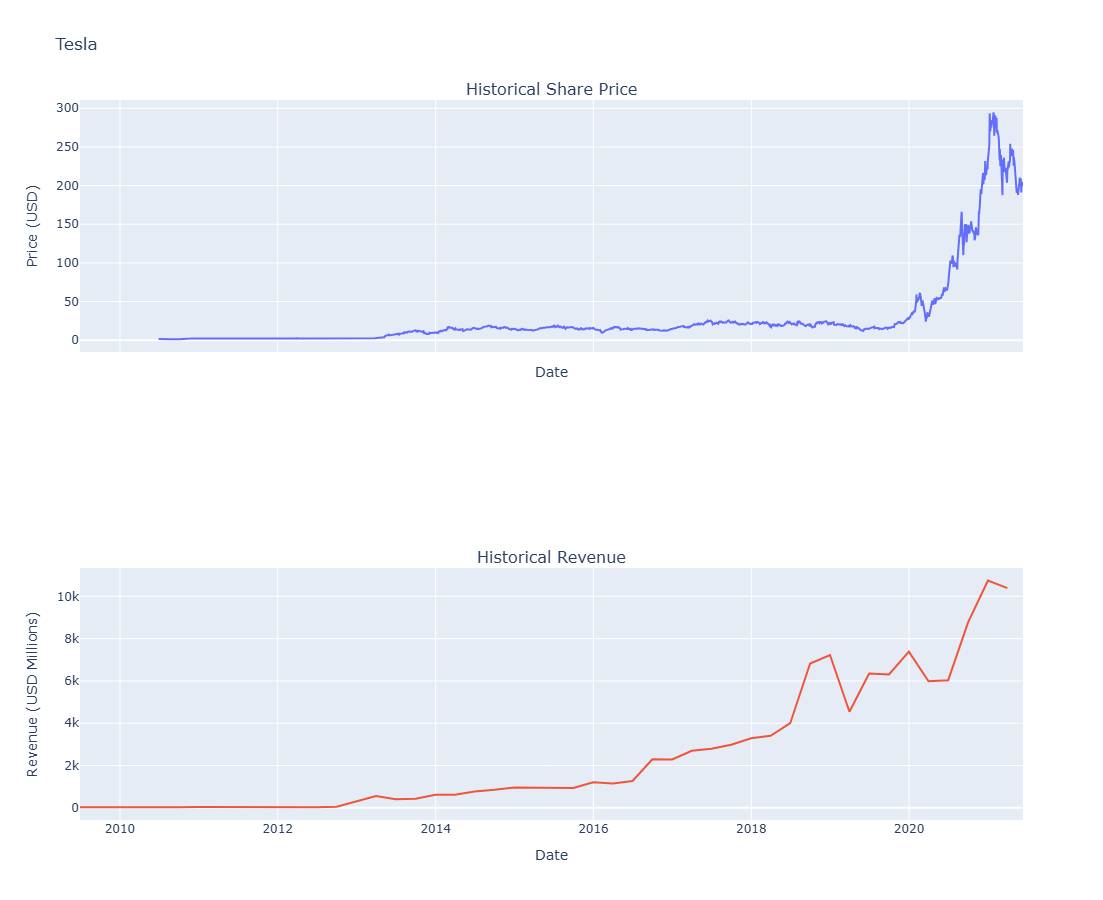

In [19]:
# Question 5: Plot Tesla Dashboard
make_graph(tesla_data, tesla_revenue, "Tesla")

Number of revenue data rows after filtering: 62


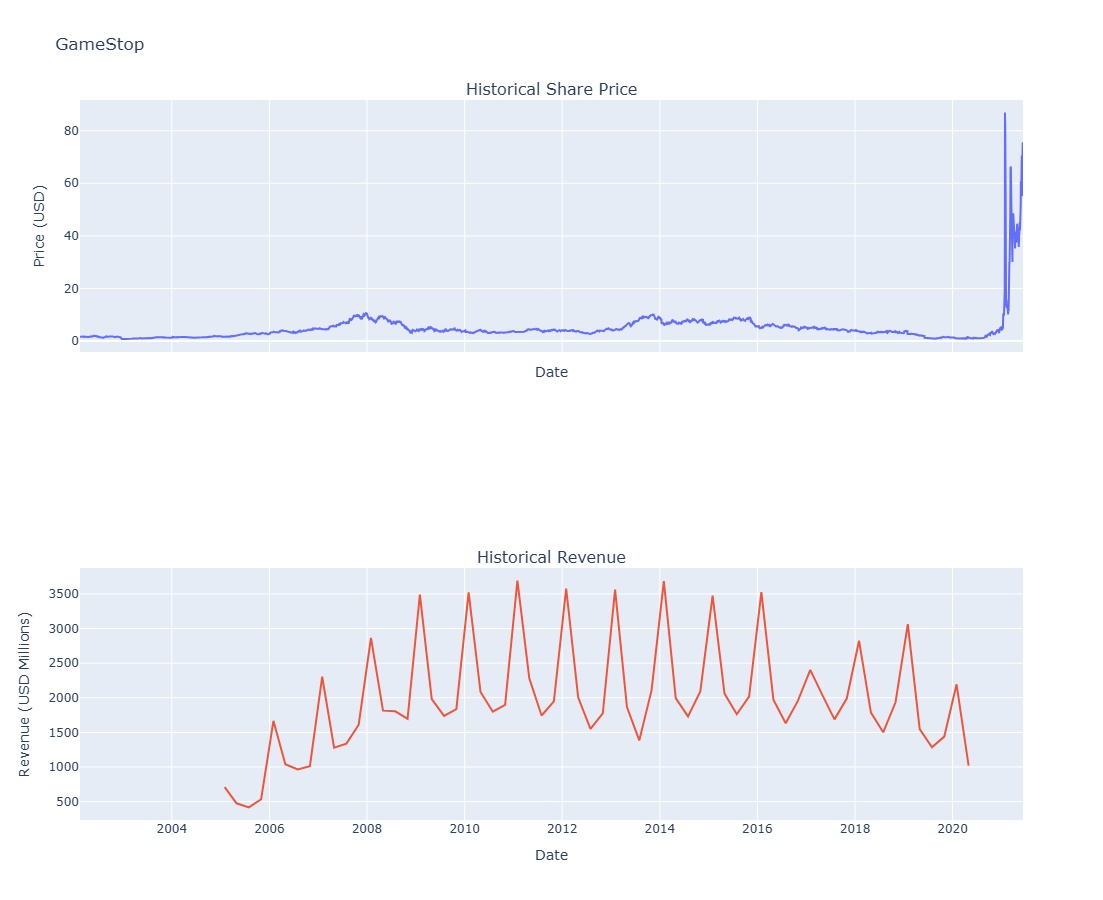

In [20]:
# Question 6: Plot GameStop Dashboard
make_graph(gme_data, gme_revenue, "GameStop")